<a href="https://colab.research.google.com/github/mashiroudon/SCCP5/blob/main/MY_HAPP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.loc[df['target'] == 0, 'target'] = "setosa"
df.loc[df['target'] == 1, 'target'] = "versicolor"
df.loc[df['target'] == 2, 'target'] = "virginica"

In [5]:
X=iris.data
y=iris.target

num_classes=len(iris.target_names)
batch_size=5
epochs=20
seed=7

In [6]:
#MLPの構築

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import rmsprop_v2
import tensorflow as tf

model=tf.keras.Sequential()
model.add(Dense(12, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
#from keras.utils import plot_model
#tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [8]:
from tensorflow.python.ops.gen_batch_ops import batch
import numpy as np
from sklearn.model_selection import KFold
kf=KFold(n_splits=5, random_state=seed, shuffle=True)
predicted=np.empty(len(y))
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
  predicted[test_index]=np.argmax(model.predict(X_test), axis=1)

Epoch 1/20
24/24 [==============================] - 3s 9ms/step - loss: 1.2292 - accuracy: 0.3250 - val_loss: 1.1034 - val_accuracy: 0.3667
Epoch 2/20
24/24 [==============================] - 0s 4ms/step - loss: 1.0706 - accuracy: 0.3833 - val_loss: 1.0491 - val_accuracy: 0.4667
Epoch 3/20
24/24 [==============================] - 0s 4ms/step - loss: 0.9673 - accuracy: 0.4917 - val_loss: 0.9283 - val_accuracy: 0.5667
Epoch 4/20
24/24 [==============================] - 0s 4ms/step - loss: 0.8574 - accuracy: 0.6917 - val_loss: 0.8637 - val_accuracy: 0.8000
Epoch 5/20
24/24 [==============================] - 0s 3ms/step - loss: 0.7788 - accuracy: 0.8000 - val_loss: 0.7830 - val_accuracy: 0.6000
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.7500 - val_loss: 0.7118 - val_accuracy: 0.9667
Epoch 7/20
24/24 [==============================] - 0s 3ms/step - loss: 0.6345 - accuracy: 0.9000 - val_loss: 0.7096 - val_accuracy: 0.6000
Epoch 8/20
24/24 [==

In [9]:
from sklearn.metrics import accuracy_score
print('Test accuracy:', accuracy_score(y, predicted))

Test accuracy: 0.9666666666666667


In [10]:
#CNN

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test)=mnist.load_data()

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print("X_train[0]:")
print(X_train[0])

11501568/11490434 [==============================] - 3s 0us/step
X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
X_train[0]:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 

In [11]:
#データの正規化

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

from keras import backend as K
img_rows, img_cols = X_train.shape[1:3]
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [25]:
!pip install keras-optimizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement keras-optimizers (from versions: none)
ERROR: No matching distribution found for keras-optimizers


In [12]:
batch_size = 128
num_classes = 10
epochs = 50

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adadelta
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

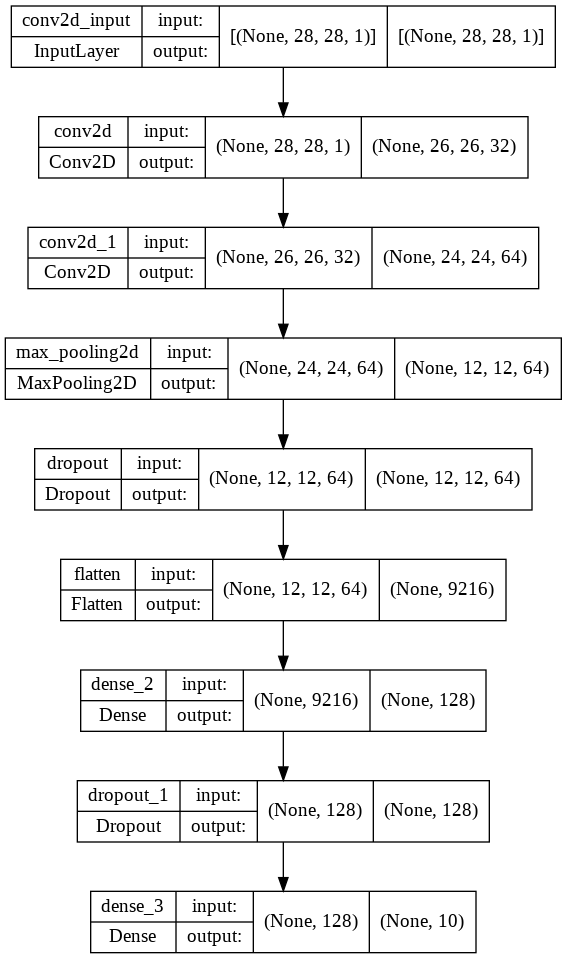

In [13]:
from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [14]:
hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_test, y_test))

Epoch 1/50
469/469 [==============================] - 14s 10ms/step - loss: 2.2796 - accuracy: 0.1291 - val_loss: 2.2433 - val_accuracy: 0.2922
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 2.2209 - accuracy: 0.2346 - val_loss: 2.1723 - val_accuracy: 0.4592
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 2.1466 - accuracy: 0.3390 - val_loss: 2.0778 - val_accuracy: 0.5754
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 2.0469 - accuracy: 0.4331 - val_loss: 1.9488 - val_accuracy: 0.6714
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 1.9159 - accuracy: 0.5071 - val_loss: 1.7810 - val_accuracy: 0.7343
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 1.7552 - accuracy: 0.5622 - val_loss: 1.5817 - val_accuracy: 0.7686
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 1.5801 - accuracy: 0.6063 - val_loss: 1.3726 - val_accuracy: 0.7901
Epoc

In [15]:
score=model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.28446993231773376
Test accuracy: 0.9182000160217285


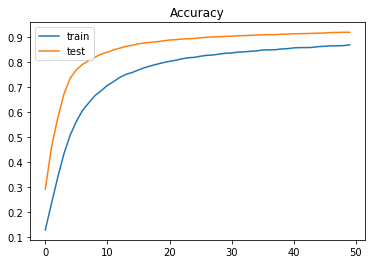

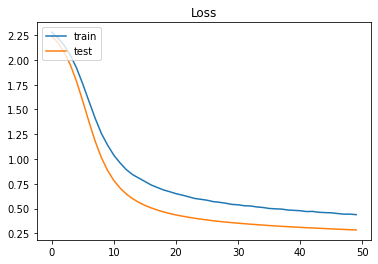

In [17]:
import matplotlib.pyplot as plt

#正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

#ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [18]:
!wget  "https://drive.google.com/uc?export=download&id=1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP" -O project0_data.zip
!unzip project0_data.zip

--2022-09-12 00:45:52--  https://drive.google.com/uc?export=download&id=1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP
Resolving drive.google.com (drive.google.com)... 74.125.142.139, 74.125.142.101, 74.125.142.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/am80e88hqlnqpjtirfk0nj314q08r8fk/1662943500000/12360162376384578551/*/1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP?e=download&uuid=d74a0bd8-5fdf-41bc-8d81-e76c4d211bac [following]
--2022-09-12 00:45:53--  https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/am80e88hqlnqpjtirfk0nj314q08r8fk/1662943500000/12360162376384578551/*/1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP?e=download&uuid=d74a0bd8-5fdf-41bc-8d81-e76c4d211bac
Resolving doc-10-3c-docs.googleusercontent.com (doc-10-3c-docs.googleusercontent.com)... 74.125.142.132, 2607:

In [19]:
#RNN

import numpy as np
import os
import glob
target_acts=['act01', 'act02', 'act03']
X_train=[]
y_train=[]
for i, target_act in enumerate(target_acts):
  for fname in sorted(glob.glob(os.path.join(target_act, '*.txt'))):
    X_train.append(np.loadtxt(fname))
    y_train.append(i)
X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=[]
for fname in sorted(glob.glob(os.path.join('test', '*.txt'))):
  X_test.append(np.loadtxt(fname))
X_test=np.array(X_test)
y_test=np.array([1, 2, 2, 2, 0, 2, 0, 1, 0, 1])

In [20]:
X_train.shape

(21, 101, 3)

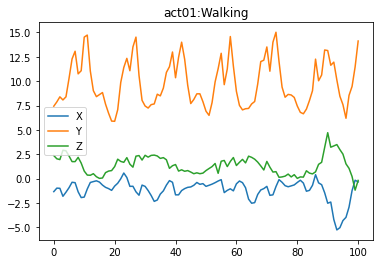

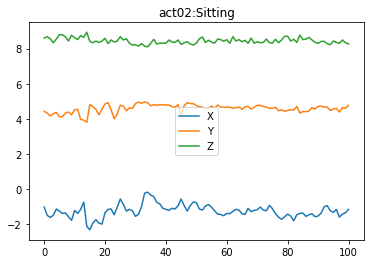

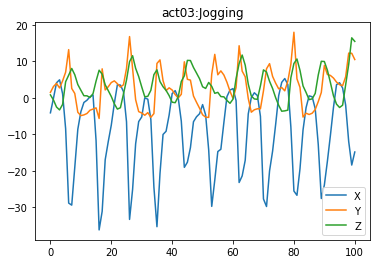

In [21]:
import matplotlib.pyplot as plt
act_names=['Walking', 'Sitting', 'Jogging']
for i in range(3):
  plt.plot(X_train[y_train==i][0])
  plt.title(target_acts[i]+':'+act_names[i])
  plt.legend(['X', 'Y', 'Z'])
  plt.show()

In [22]:
timesteps, features = X_train.shape[-2:]
num_classes = len(target_acts)
print("Timesteps:", timesteps)
print("Features:", features)
print("# of Classes:", num_classes)

Timesteps: 101
Features: 3
# of Classes: 3


In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding, Masking
from keras.layers import LSTM
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Masking(mask_value=0., input_shape=(timesteps, features)))
model.add(tf.keras.layers.LSTM(128, return_sequences=False, recurrent_dropout=0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

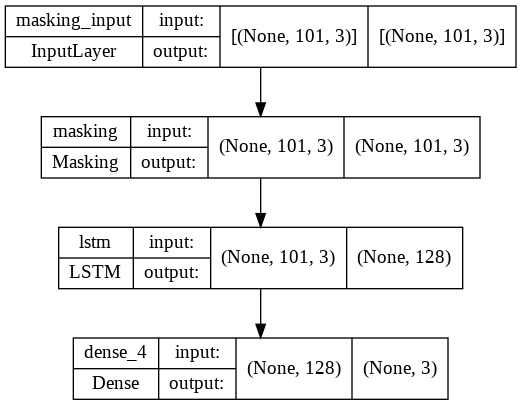

In [24]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [25]:
batch_size=7
epochs=10

hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_test, y_test))

Epoch 1/10
3/3 [==============================] - 3s 363ms/step - loss: 0.8591 - accuracy: 0.6667 - val_loss: 0.3535 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 1s 186ms/step - loss: 0.2552 - accuracy: 1.0000 - val_loss: 0.1461 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 1s 186ms/step - loss: 0.1075 - accuracy: 1.0000 - val_loss: 0.0735 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 1s 187ms/step - loss: 0.0578 - accuracy: 1.0000 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 1s 190ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 1s 184ms/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 182ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 8/10
3/3 [====

In [26]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.006152404937893152
Test accuracy: 1.0


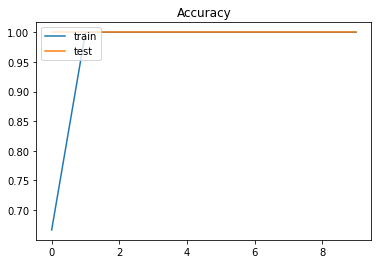

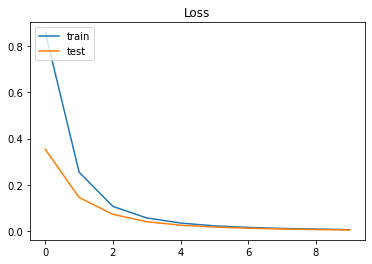

In [27]:
#正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

#ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()